In [1]:
## All the packages I am going to use

import numpy as np
import scipy.linalg as lin
import os
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# special matplotlib argument for improved plots
from matplotlib import rcParams


rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 3
rcParams['font.size'] = 14
rcParams['font.family'] = 'StixGeneral'

In [12]:
##Constant table

h_bar=1.0
m=1.0
alpha=0.5

## Part 1. Rashba Effect

**Rashba Hamiltonian:**

$
\begin{align}
H_{Ra} &=\alpha(\vec{\mathbf{\sigma}} \times \vec{\mathbf{p}}) \cdot \hat{z} \\
&= \alpha(\sigma_{x}p_{y}-\sigma_{y}p_{x})
\end{align}
$

In [3]:
# define Pauli Matrcies

sigmax=np.array([[0,1],[1,0]])
sigmay=np.array([[0,-1j],[1j,0]])
sigmaz=np.array([[1,0],[0,-1]])



In [13]:
## Define Rashba Hamiltonian:

def Rash_Ham(kpx,kpy):
    H_0=(h_bar**2/(2*m))*(kpx**2+kpy**2)*(np.array([[1,0],[0,1]]))
    H_1=alpha*(sigmax*kpy-sigmay*kpx)
    return H_0+H_1

print Rash_Ham(3,3)

[[ 9.0+0.j   1.5+1.5j]
 [ 1.5-1.5j  9.0+0.j ]]


In [21]:
k_point=np.linspace(-3,3,200)

band1=[]
band2=[]

for i in k_point:
    eign_val=lin.eigh(Rash_Ham(i,0))[0]
    eign_vec=lin.eigh(Rash_Ham(i,0))[1]
    if eign_vec[1,0].imag<0:
        band1.append(eign_val[0])
        band2.append(eign_val[1])
    elif eign_vec[1,1].imag<0:
        band1.append(eign_val[1])
        band2.append(eign_val[0])

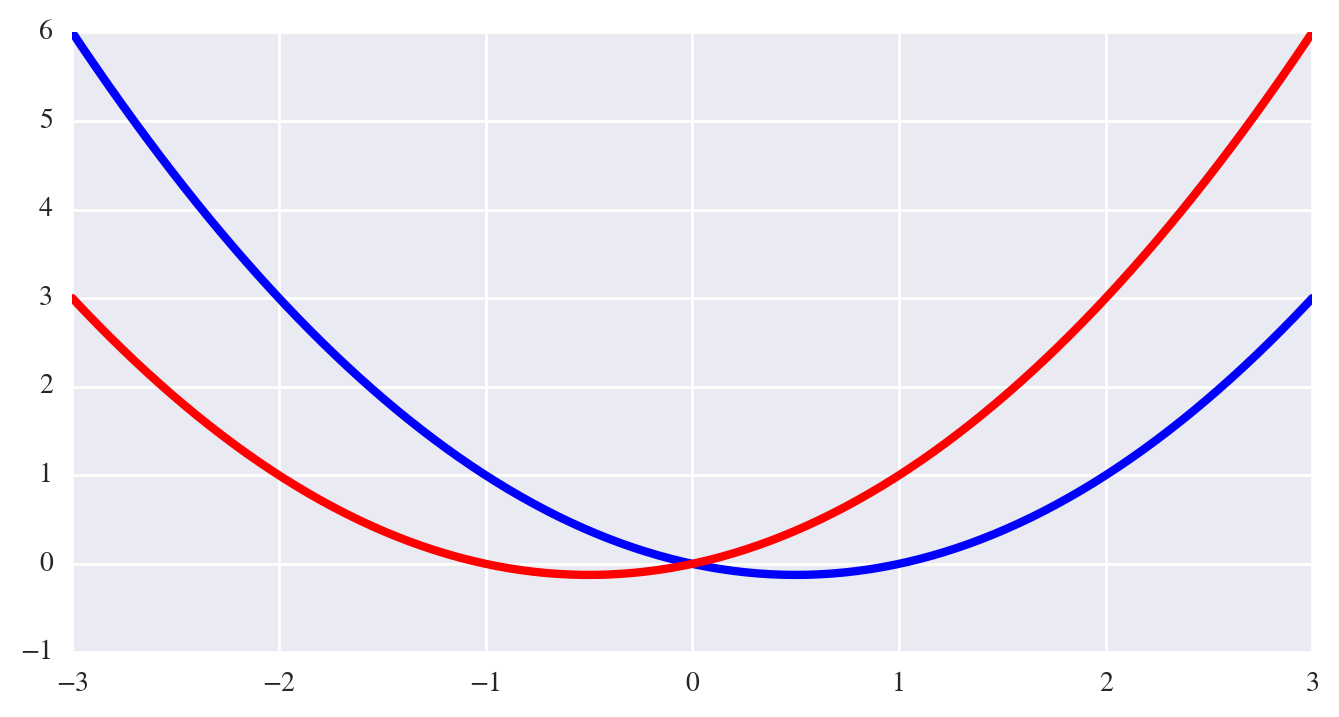

In [22]:
plt.plot(k_point,band1,'b-')
plt.plot(k_point,band2,'r-')
plt.show()

### Equal energy Surface (Fermi surface )

In this calculation, we will look at the energy $E_{F}=1$ in our parameter system

In [23]:
ra=1
kpt=[(ra*np.cos(the1),ra*np.sin(the1)) for the1 in np.linspace(-np.pi,np.pi,200)]

In [24]:
band1=[]
band2=[]

Energy=lin.eigh(Rash_Ham(kpt[0][0],kpt[0][1]))[0]
print Energy
# for i in kpt:
#     eign_vec=lin.eigh(Rash_Ham(i[0],i[1]))[1]
#     if eign_vec[1,0].imag<0:
#         band1.append(eign_val[0])
#         band2.append(eign_val[1])
#     elif eign_vec[1,1].imag<0:
#         band1.append(eign_val[1])
#         band2.append(eign_val[0])

[ 0.  1.]


In [18]:
for i in kpt:
    eign_val=lin.eigh(Rash_Ham(i[0],i[1]))[0]
    print eign_val[0]

2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125


In [10]:
len(band1)

151